In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping

dataset = './data/car.data'
data = pd.read_csv(dataset, header=None)
data

#1.데이터가 시계열성데이터가 아니라 테이블 데이터다
#2. 그래서 RNN과 같은 모델적용이 불가하다.
#3. 타임스탭을 생성해 보고자 했으나 스텝이 1밖에 도출되지 않음
#이 데이터를 가지고 RNN을 사용할 방법이 없는데, RNN을 적용하는게 맞는건지 아니면 다른 데이터가 있는지

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [2]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Class']
# CSV 파일을 불러와 데이터프레임으로 저장하면서 컬럼명을 설정합니다.
df = pd.read_csv(dataset, names=column_names)

# 데이터프레임 확인
print(df)

     buying  maint  doors persons lug_boot safety  Class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in df.columns:

    df[i]=le.fit_transform(df[i])
    
df

,buying,maint,doors,persons,lug_boot,safety,Class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [5]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64

In [6]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Class'], dtype='object')

Text(0.5, 1.0, 'Label')

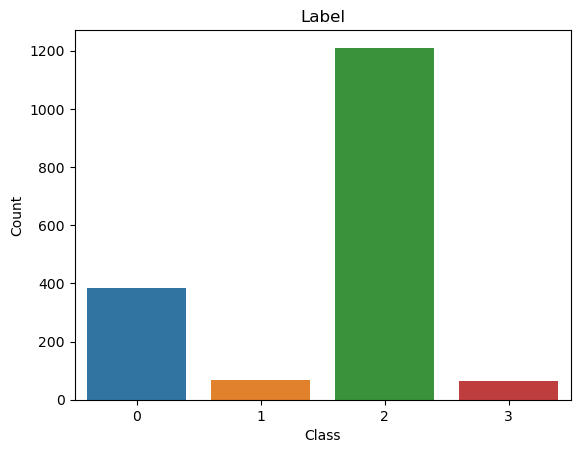

In [7]:
sns.countplot(data = df, x="Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Label")

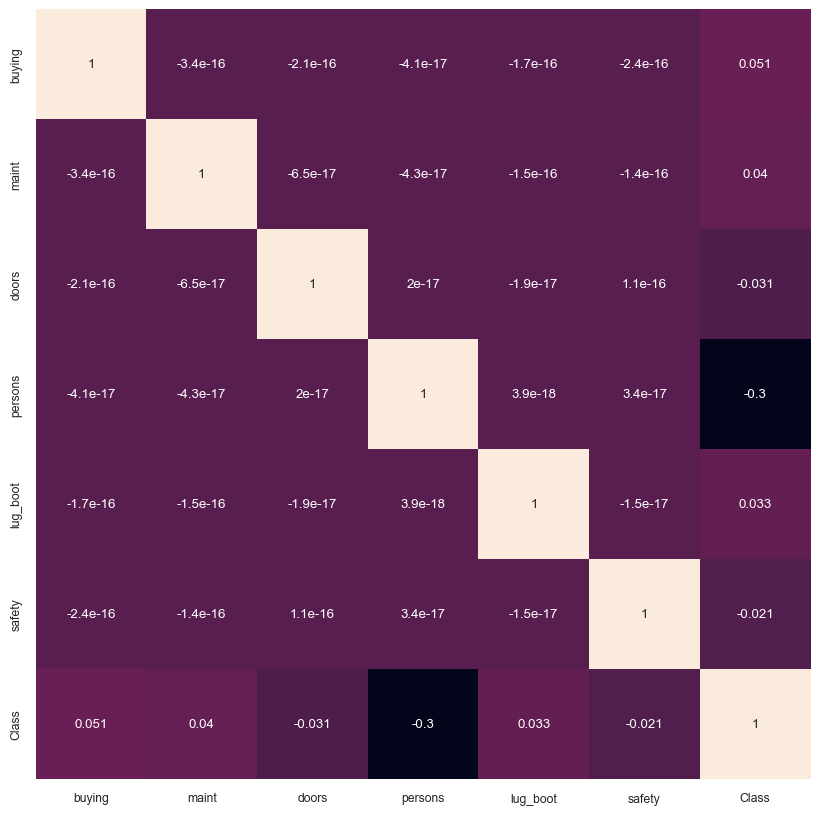

In [8]:
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

Y = pd.get_dummies(y).values

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 6), (346, 6), (1382, 4), (346, 4))

In [11]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [12]:
#옵티마이저가 뭔지, 각 옵티마이저의 차이점, 활성화 함수의 종류와 차이점, 입력층, 출력층의 의미, lr값 조정, accuracy
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Nadam
model = Sequential()

model.add(Dense(16,input_shape=(6,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Nadam(lr=0.001),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 1,252
Trainable params: 1,252
Non-trainable params: 0
_________________________________________________________________


C:\Users\adminastor\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\nadam.py:89: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3)

In [14]:
# dropout, early stopping, learning rate 바꿔보기, batch size 바꿔보기, activation function 바꿔보기, dense unit, 층 수 그리드서치 (찾아보기)
# 옵티마이저 바꿔보기 (RMSProp, AdamW), 특성공학 해보기, 정규화 방법 바꿔보기 (z score, min-max, robust), Sparse Categorical Crossentropy
# f1 score 평가 함수

model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test), callbacks = [early_stopping])
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 1s 6ms/step - loss: 1.0614 - accuracy: 0.6766 - val_loss: 0.8715 - val_accuracy: 0.6936
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.8339 - accuracy: 0.7019 - val_loss: 0.7946 - val_accuracy: 0.6936
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 0.7801 - accuracy: 0.7019 - val_loss: 0.7533 - val_accuracy: 0.6936
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.7325 - accuracy: 0.7033 - val_loss: 0.7176 - val_accuracy: 0.6908
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.7106 - val_loss: 0.6816 - val_accuracy: 0.6908
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.7171 - val_loss: 0.6655 - val_accuracy: 0.6792
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.7207 - val_loss: 0.6431 - val_accuracy: 0.6879
Epoch 8/100
4

In [15]:
from sklearn.metrics import f1_score

f1_score(y_test_class, y_pred_class, average = "macro")

0.9015849911305118

In [16]:
# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_loss:', test_loss, 'test_acc:', test_acc)
# 테스트 데이터 입력하여 예측값 구하기
predict = model.predict(X_test)

# RMSE 오차 확인
rmse = tf.sqrt(tf.reduce_mean(tf.square(y_test - predict)))
print("RMSE : ", rmse)

11/11 [==============================] - 0s 1ms/step - loss: 0.1532 - accuracy: 0.9451
test_loss: 0.1532151699066162 test_acc: 0.9450867176055908
11/11 [==============================] - 0s 1ms/step
RMSE :  tf.Tensor(0.14600596, shape=(), dtype=float32)


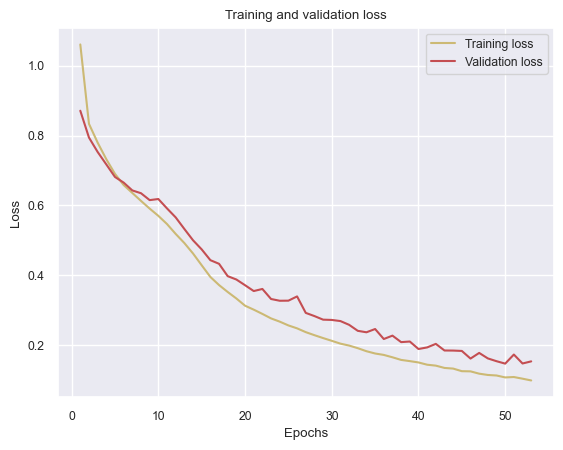

In [17]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

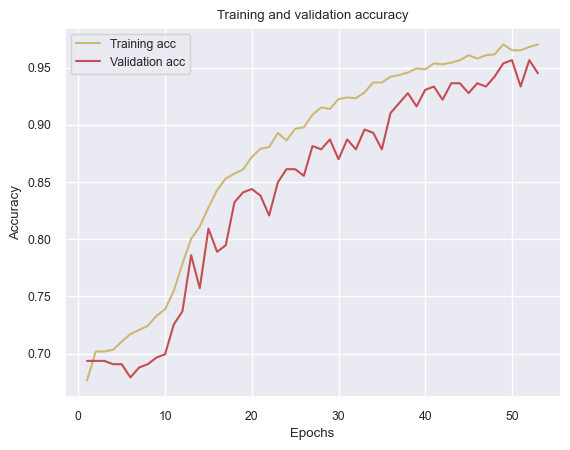

In [18]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90        79
           1       0.93      0.76      0.84        17
           2       1.00      0.95      0.97       240
           3       0.90      0.90      0.90        10

    accuracy                           0.95       346
   macro avg       0.91      0.90      0.90       346
weighted avg       0.95      0.95      0.95       346

[[ 77   1   1   0]
 [  3  13   0   1]
 [ 12   0 228   0]
 [  1   0   0   9]]
